In [1]:
pwd

'C:\\Users\\YIGIT\\Documents\\GitHub\\ML-for-NLP\\code'

In [2]:
cd ..

C:\Users\YIGIT\Documents\GitHub\ML-for-NLP


In [3]:
cd ..

C:\Users\YIGIT\Documents\GitHub


In [4]:
cd ..

C:\Users\YIGIT\Documents


In [5]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YIGIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YIGIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YIGIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
# Load the dataset
data = pd.read_csv("realdonaldtrump.csv")

In [7]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)

In [8]:
# Text preprocessing function
def preprocess_text(text):
    # Remove hashtags, mentions, and URLs
    text = re.sub(r"(?:\@|\#|https?\://)\S+", "", text)
    
    # Remove emojis
    text = remove_emojis(text)

    
    # Remove punctuation, special characters, and numbers
    text = text.translate(str.maketrans("", "", string.punctuation + string.digits))
    
    # Remove formatting symbols and escape characters
    text = re.sub(r"\\[a-z]+", "", text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove redundant spaces
    text = " ".join(text.split())
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    
    return " ".join(tokens)


In [9]:
# Apply text preprocessing
data["processed_tweet"] = data["Tweets"].apply(preprocess_text)

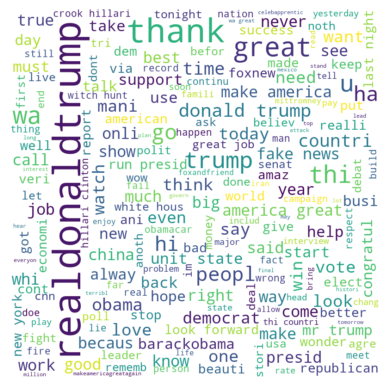

In [10]:
# Create wordcloud
all_words = " ".join(text for text in data["processed_tweet"])
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
# N-grams
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data["processed_tweet"])

In [12]:
# Sentiment analysis using Vader
analyzer = SentimentIntensityAnalyzer()
data["sentiment_score"] = data["processed_tweet"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
data.head()

,id,link,Tweets,Date,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,04/05/2009 13:54,510,917,NaN,NaN,sure tune watch donald trump late night david ...,0.4767
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,04/05/2009 20:00,34,267,NaN,NaN,donald trump appear view tomorrow morn discus ...,0.7506
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,08/05/2009 08:38,13,19,NaN,NaN,donald trump read top ten financi tip late sho...,0.2023
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,08/05/2009 15:40,11,26,NaN,NaN,new blog post celebr apprentic final lesson le...,0.0000
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",12/05/2009 09:07,1375,1945,NaN,NaN,persona never wallflow ’ rather build wall cli...,0.0000


In [13]:
# Create a DataFrame with processed tweets and sentiment scores
tweet_sentiment_df = pd.DataFrame(
    {"Processed Tweet": data["Tweets"], "Sentiment Score": data["sentiment_score"]}
)

# Display the DataFrame
print(tweet_sentiment_df)


                                         Processed Tweet  Sentiment Score
0      Be sure to tune in and watch Donald Trump on L...           0.4767
1      Donald Trump will be appearing on The View tom...           0.7506
2      Donald Trump reads Top Ten Financial Tips on L...           0.2023
3      New Blog Post: Celebrity Apprentice Finale and...           0.0000
4      "My persona will never be that of a wallflower...           0.0000
...                                                  ...              ...
43347  Joe Biden was a TOTAL FAILURE in Government. H...           0.0000
43348  Will be interviewed on @ seanhannity tonight a...           0.4939
43349                         pic.twitter.com/3lm1spbU8X           0.0000
43350                         pic.twitter.com/vpCE5MadUz           0.0000
43351                         pic.twitter.com/VLlc0BHW41           0.0000

[43352 rows x 2 columns]


In [14]:
data['Tweets'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

0        0.5255
1        0.7712
2        0.6468
3        0.0000
4        0.0000
          ...  
43347   -0.6514
43348    0.5411
43349    0.0000
43350    0.0000
43351    0.0000
Name: Tweets, Length: 43352, dtype: float64

In [15]:
data.head()

,id,link,Tweets,Date,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,04/05/2009 13:54,510,917,NaN,NaN,sure tune watch donald trump late night david ...,0.4767
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,04/05/2009 20:00,34,267,NaN,NaN,donald trump appear view tomorrow morn discus ...,0.7506
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,08/05/2009 08:38,13,19,NaN,NaN,donald trump read top ten financi tip late sho...,0.2023
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,08/05/2009 15:40,11,26,NaN,NaN,new blog post celebr apprentic final lesson le...,0.0000
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",12/05/2009 09:07,1375,1945,NaN,NaN,persona never wallflow ’ rather build wall cli...,0.0000


In [16]:
data['neutral'] = data['Tweets'].apply(lambda x: analyzer.polarity_scores(str(x))['neu'])
data['negative'] = data['Tweets'].apply(lambda x: analyzer.polarity_scores(str(x))['neg'])
data['positive'] = data['Tweets'].apply(lambda x: analyzer.polarity_scores(str(x))['pos'])

In [17]:
data.head(7)

,id,link,Tweets,Date,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score,neutral,negative,positive
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,04/05/2009 13:54,510,917,NaN,NaN,sure tune watch donald trump late night david ...,0.4767,0.827,0.000,0.173
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,04/05/2009 20:00,34,267,NaN,NaN,donald trump appear view tomorrow morn discus ...,0.7506,0.740,0.000,0.260
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,08/05/2009 08:38,13,19,NaN,NaN,donald trump read top ten financi tip late sho...,0.2023,0.726,0.000,0.274
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,08/05/2009 15:40,11,26,NaN,NaN,new blog post celebr apprentic final lesson le...,0.0000,1.000,0.000,0.000
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",12/05/2009 09:07,1375,1945,NaN,NaN,persona never wallflow ’ rather build wall cli...,0.0000,1.000,0.000,0.000
5,1.776420e+09,https://twitter.com/realDonaldTrump/status/177...,"Miss USA Tara Conner will not be fired - ""I've...",12/05/2009 14:21,29,28,NaN,NaN,miss usa tara conner fire ive alway believ sec...,-0.4588,0.780,0.078,0.142
6,1.786561e+09,https://twitter.com/realDonaldTrump/status/178...,Listen to an interview with Donald Trump discu...,13/05/2009 12:38,15,16,NaN,NaN,listen interview donald trump discus hi new bo...,0.7506,0.670,0.000,0.330


In [18]:
data['sentiment']=''
data.loc[data.sentiment_score>0.05,'sentiment']='Positive'
data.loc[(data.sentiment_score>-0.05) & (data.sentiment_score<0.05),'sentiment']='Neutral'
data.loc[data.sentiment_score<-0.05,'sentiment']='Negative'

In [19]:
data.tail()

,id,link,Tweets,Date,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score,neutral,negative,positive,sentiment
43347,1.273410e+18,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,17/06/2020 19:00,23402,116377,NaN,NaN,joe biden wa total failur govern “ bungl ” eve...,0.0000,0.735,0.265,0.00,Neutral
43348,1.273410e+18,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,17/06/2020 19:11,11810,56659,@seanhannity,NaN,interview seanhann tonight pm enjoy,0.4939,0.720,0.000,0.28,Positive
43349,1.273440e+18,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,17/06/2020 21:27,4959,19344,NaN,NaN,pictwittercomlmspbux,0.0000,1.000,0.000,0.00,Neutral
43350,1.273440e+18,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,17/06/2020 21:28,4627,17022,NaN,NaN,pictwittercomvpcemaduz,0.0000,1.000,0.000,0.00,Neutral
43351,1.273440e+18,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/VLlc0BHW41,17/06/2020 21:28,3951,14344,NaN,NaN,pictwittercomvllcbhw,0.0000,1.000,0.000,0.00,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

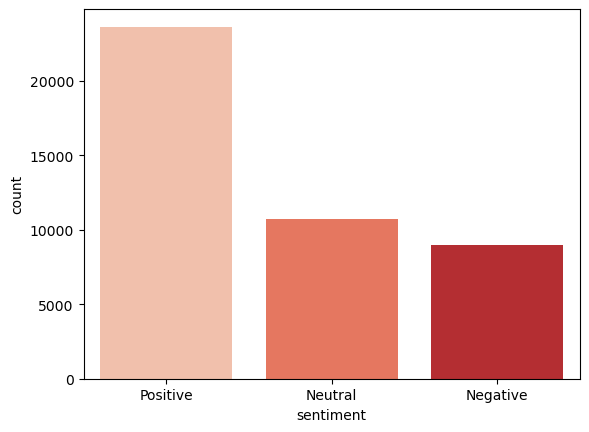

In [20]:
import seaborn as sns
sns.countplot(x='sentiment', data=data, palette="Reds")

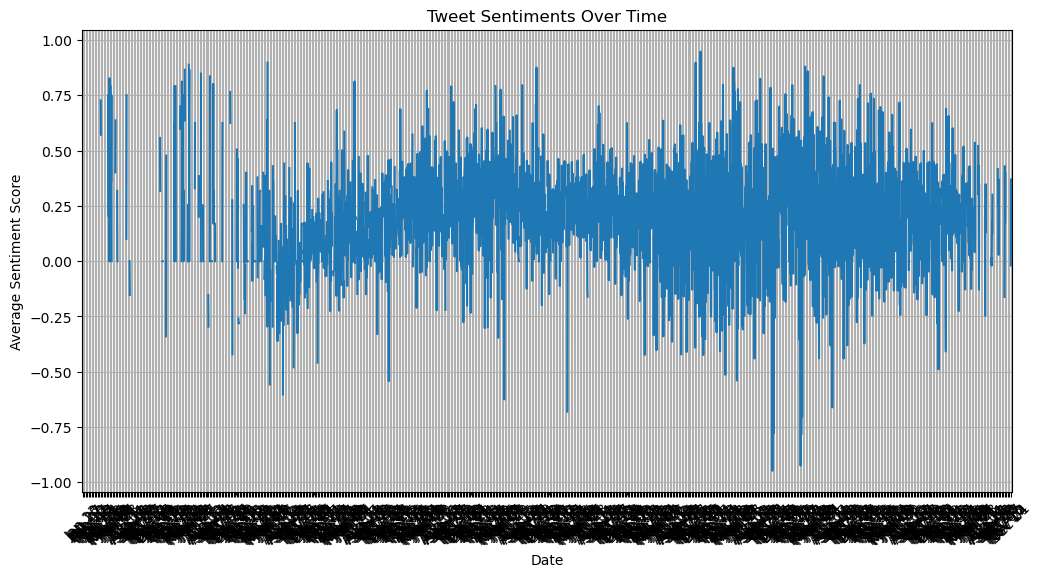

In [21]:
import matplotlib.dates as mdates

# Convert the date column to datetime format
#data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d %H:%M:%S")
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)


# Set the datetime column as the index
data.set_index("Date", inplace=True)

# Resample the data by day and calculate the mean sentiment score for each day
daily_sentiment = data["sentiment_score"].resample("D").mean()

# Plot the tweet sentiments over time
fig, ax = plt.subplots(figsize=(12, 6))
daily_sentiment.plot(ax=ax)

ax.set(xlabel="Date", ylabel="Average Sentiment Score", title="Tweet Sentiments Over Time")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\YIGIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


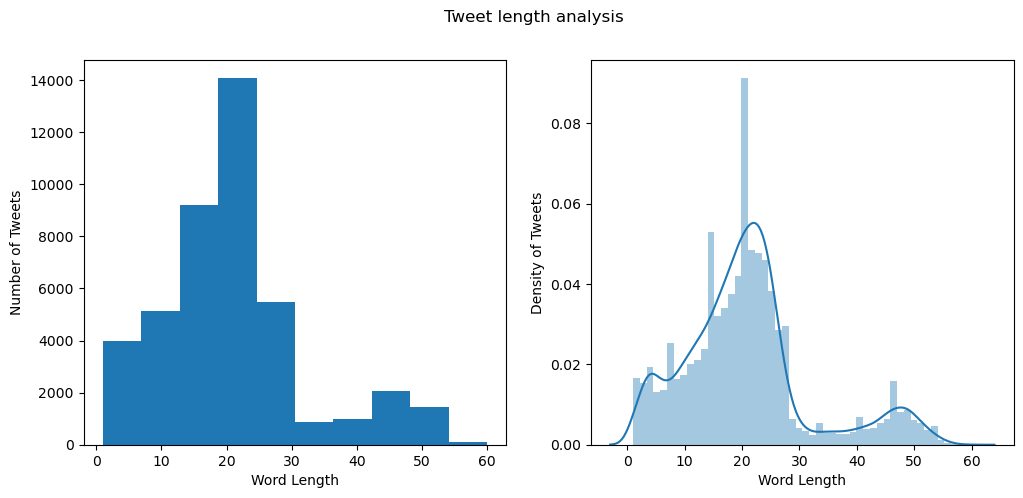

In [24]:
tweet_lengths = data['Tweets'].apply(lambda x: len(x.split()))

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(tweet_lengths)
plt.suptitle("Tweet length analysis")
plt.xlabel("Word Length")
plt.ylabel("Number of Tweets")

plt.subplot(1,2,2)
sns.distplot(tweet_lengths)
plt.xlabel("Word Length")
plt.ylabel("Density of Tweets")
plt.show()

Majority of tweets lie within the range of 25-45 words.
Number of tweets of length > 45 and length <10 are very low.

In [28]:
data.isnull()

,id,link,Tweets,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score,neutral,negative,positive,sentiment
Date,,,,,,,,,,,,,
2009-04-05 13:54:00,False,False,False,False,False,True,True,False,False,False,False,False,False
2009-04-05 20:00:00,False,False,False,False,False,True,True,False,False,False,False,False,False
2009-08-05 08:38:00,False,False,False,False,False,True,True,False,False,False,False,False,False
2009-08-05 15:40:00,False,False,False,False,False,True,True,False,False,False,False,False,False
2009-12-05 09:07:00,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 19:00:00,False,False,False,False,False,True,True,False,False,False,False,False,False
2020-06-17 19:11:00,False,False,False,False,False,False,True,False,False,False,False,False,False
2020-06-17 21:27:00,False,False,False,False,False,True,True,False,False,False,False,False,False


In [32]:
from wordcloud import WordCloud, STOPWORDS

# function to build sentiment wisewordcloud:
def show_wordcloud(data):
    sentiments=data.sentiment.value_counts().index.to_list()
    
    stopwords = set(STOPWORDS)
    
    plt.subplots(figsize=(14,14))
    i=1
    for senti in sentiments:
        curr=data['Tweets'].loc[data.sentiment==senti]
        text=curr.values
        text=' '.join(text)
        
        wordcloud=WordCloud(max_words=100, stopwords=stopwords, background_color='white', max_font_size=50).generate(text)
        
        plt.subplot(3,2,i)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(senti,fontsize=15)
        i+=1

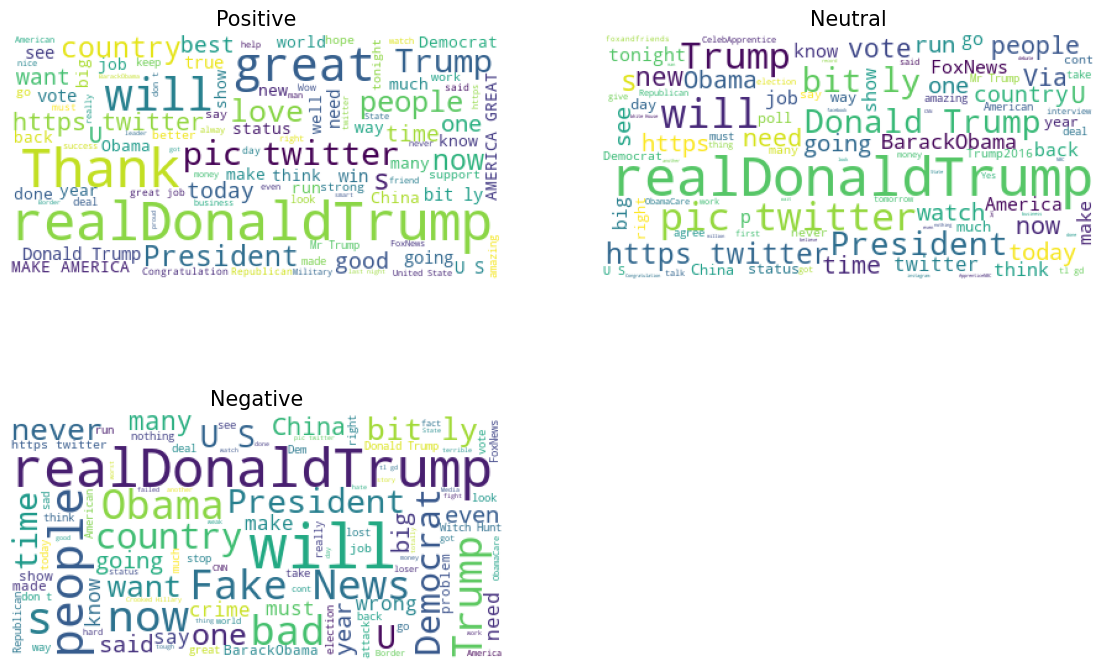

In [33]:
show_wordcloud(data)